# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#OPTIMIZER
from keras.optimizers import Adam

#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D,BatchNormalization
from keras import models
from keras import layers
import tensorflow as tf
from keras.utils import plot_model

from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


# PATH & LABEL PROCESS

#### MAIN PATH

In [2]:
Fire_Dataset_Path = Path("fire_dataset")

#### PATH PROCESS

In [3]:
PNG_Path = list(Fire_Dataset_Path.glob(r"*/*.png"))

#### LABEL PROCESS

In [4]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [5]:
print("FIRE: ", PNG_Labels.count("fire_images"))
print("NO_FIRE: ", PNG_Labels.count("non_fire_images"))

FIRE:  755
NO_FIRE:  244


In [6]:
PNG_Labels

['fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_i

# TRANSFORMATION TO SERIES STRUCTURE

In [7]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [8]:
print(PNG_Path_Series)

0               fire_dataset\fire_images\fire.1.png
1              fire_dataset\fire_images\fire.10.png
2             fire_dataset\fire_images\fire.100.png
3             fire_dataset\fire_images\fire.101.png
4             fire_dataset\fire_images\fire.102.png
                           ...                     
994    fire_dataset\non_fire_images\non_fire.95.png
995    fire_dataset\non_fire_images\non_fire.96.png
996    fire_dataset\non_fire_images\non_fire.97.png
997    fire_dataset\non_fire_images\non_fire.98.png
998    fire_dataset\non_fire_images\non_fire.99.png
Name: PNG, Length: 999, dtype: object


In [9]:
print(PNG_Labels_Series)

0          fire_images
1          fire_images
2          fire_images
3          fire_images
4          fire_images
            ...       
994    non_fire_images
995    non_fire_images
996    non_fire_images
997    non_fire_images
998    non_fire_images
Name: CATEGORY, Length: 999, dtype: object


In [10]:
PNG_Labels_Series.replace({"non_fire_images":"NO_FIRE","fire_images":"FIRE"},inplace=True)

In [11]:
print(PNG_Labels_Series)

0         FIRE
1         FIRE
2         FIRE
3         FIRE
4         FIRE
        ...   
994    NO_FIRE
995    NO_FIRE
996    NO_FIRE
997    NO_FIRE
998    NO_FIRE
Name: CATEGORY, Length: 999, dtype: object


# TRANSFORMATION TO DATAFRAME STRUCTURE

In [12]:
Main_Train_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [13]:
print(Main_Train_Data.head(-1))

                                              PNG CATEGORY
0             fire_dataset\fire_images\fire.1.png     FIRE
1            fire_dataset\fire_images\fire.10.png     FIRE
2           fire_dataset\fire_images\fire.100.png     FIRE
3           fire_dataset\fire_images\fire.101.png     FIRE
4           fire_dataset\fire_images\fire.102.png     FIRE
..                                            ...      ...
993  fire_dataset\non_fire_images\non_fire.94.png  NO_FIRE
994  fire_dataset\non_fire_images\non_fire.95.png  NO_FIRE
995  fire_dataset\non_fire_images\non_fire.96.png  NO_FIRE
996  fire_dataset\non_fire_images\non_fire.97.png  NO_FIRE
997  fire_dataset\non_fire_images\non_fire.98.png  NO_FIRE

[998 rows x 2 columns]


#### SHUFFLING

In [14]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [15]:
print(Main_Train_Data.head(-1))

                                               PNG CATEGORY
0            fire_dataset\fire_images\fire.430.png     FIRE
1            fire_dataset\fire_images\fire.565.png     FIRE
2            fire_dataset\fire_images\fire.174.png     FIRE
3            fire_dataset\fire_images\fire.270.png     FIRE
4            fire_dataset\fire_images\fire.637.png     FIRE
..                                             ...      ...
993          fire_dataset\fire_images\fire.687.png     FIRE
994          fire_dataset\fire_images\fire.525.png     FIRE
995   fire_dataset\non_fire_images\non_fire.65.png  NO_FIRE
996   fire_dataset\non_fire_images\non_fire.74.png  NO_FIRE
997  fire_dataset\non_fire_images\non_fire.210.png  NO_FIRE

[998 rows x 2 columns]


In [16]:
print(Main_Train_Data["PNG"][2])
print(Main_Train_Data["CATEGORY"][2])
print(Main_Train_Data["PNG"][200])
print(Main_Train_Data["CATEGORY"][200])
print(Main_Train_Data["PNG"][45])
print(Main_Train_Data["CATEGORY"][45])
print(Main_Train_Data["PNG"][852])
print(Main_Train_Data["CATEGORY"][852])

fire_dataset\fire_images\fire.174.png
FIRE
fire_dataset\fire_images\fire.573.png
FIRE
fire_dataset\non_fire_images\non_fire.60.png
NO_FIRE
fire_dataset\fire_images\fire.524.png
FIRE


In [19]:
print(Main_Train_Data.head(-1))

                                               PNG CATEGORY
0            fire_dataset\fire_images\fire.430.png     FIRE
1            fire_dataset\fire_images\fire.565.png     FIRE
2            fire_dataset\fire_images\fire.174.png     FIRE
3            fire_dataset\fire_images\fire.270.png     FIRE
4            fire_dataset\fire_images\fire.637.png     FIRE
..                                             ...      ...
993          fire_dataset\fire_images\fire.687.png     FIRE
994          fire_dataset\fire_images\fire.525.png     FIRE
995   fire_dataset\non_fire_images\non_fire.65.png  NO_FIRE
996   fire_dataset\non_fire_images\non_fire.74.png  NO_FIRE
997  fire_dataset\non_fire_images\non_fire.210.png  NO_FIRE

[998 rows x 2 columns]


# VISUALIZATION

In [20]:
plt.style.use("dark_background")

#### GENERAL

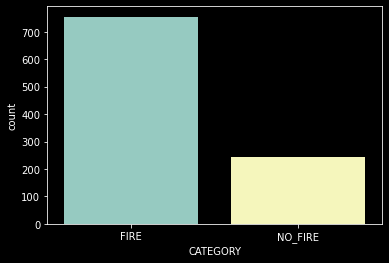

In [20]:

sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

# DETERMINATION TRAIN AND TEST DATA

#### IMAGE GENERATOR

In [21]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [22]:
Test_Generator = ImageDataGenerator(rescale=1./255)

#### SPLITTING TRAIN AND TEST

In [23]:
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)

In [24]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (899, 2)
TEST SHAPE:  (100, 2)


In [25]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                               PNG CATEGORY
599          fire_dataset\fire_images\fire.306.png     FIRE
432          fire_dataset\fire_images\fire.730.png     FIRE
221          fire_dataset\fire_images\fire.537.png     FIRE
973          fire_dataset\fire_images\fire.392.png     FIRE
525          fire_dataset\fire_images\fire.684.png     FIRE
..                                             ...      ...
71           fire_dataset\fire_images\fire.588.png     FIRE
106  fire_dataset\non_fire_images\non_fire.191.png  NO_FIRE
270          fire_dataset\fire_images\fire.563.png     FIRE
860          fire_dataset\fire_images\fire.620.png     FIRE
435          fire_dataset\fire_images\fire.718.png     FIRE

[898 rows x 2 columns]
--------------------------------------------------------------------------------
                                               PNG CATEGORY
453  fire_dataset\non_fire_images\non_fire.163.png  NO_FIRE
793          fire_dataset\fire_images\fire.324.png     

In [26]:
print(Test_Data["CATEGORY"].value_counts())

FIRE       80
NO_FIRE    20
Name: CATEGORY, dtype: int64


In [27]:
encode = LabelEncoder()

In [28]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])

In [29]:
For_Prediction_Class

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

#### How Generator Applied Image Look Like

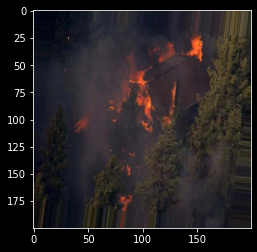

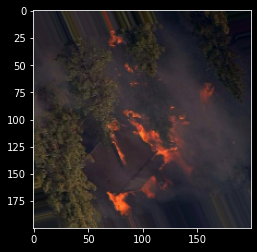

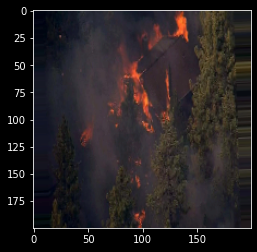

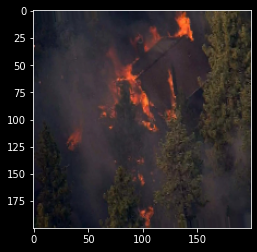

In [30]:
example_Image = Train_Data["PNG"][99]
Load_Image = tf.keras.utils.load_img(example_Image,target_size=(200,200))
Array_Image = tf.keras.utils.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [48]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   batch_size=32,
                                                   subset="training")

Found 810 validated image filenames belonging to 2 classes.


In [49]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                     class_mode="binary",
                                                   batch_size=32,
                                                   subset="validation")

Found 89 validated image filenames belonging to 2 classes.


In [50]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="PNG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                  class_mode="binary",
                                                 batch_size=32)

Found 100 validated image filenames belonging to 2 classes.


# CNN

In [55]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(128,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [56]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [57]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [58]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                      epochs=50,callbacks=Call_Back)

Epoch 1/50
26/26 [==============================] - 104s 4s/step - loss: 4.0655 - accuracy: 0.8259 - val_loss: 0.5332 - val_accuracy: 0.7865
Epoch 2/50
26/26 [==============================] - 98s 4s/step - loss: 0.1912 - accuracy: 0.9235 - val_loss: 0.4865 - val_accuracy: 0.7416
Epoch 3/50
26/26 [==============================] - 98s 4s/step - loss: 0.1857 - accuracy: 0.9420 - val_loss: 0.4432 - val_accuracy: 0.7416
Epoch 4/50
26/26 [==============================] - 99s 4s/step - loss: 0.1397 - accuracy: 0.9395 - val_loss: 0.4374 - val_accuracy: 0.7640
Epoch 5/50
26/26 [==============================] - 104s 4s/step - loss: 0.1946 - accuracy: 0.9407 - val_loss: 0.4073 - val_accuracy: 0.8090
Epoch 6/50
26/26 [==============================] - 102s 4s/step - loss: 0.1718 - accuracy: 0.9333 - val_loss: 0.4116 - val_accuracy: 0.7528
Epoch 7/50
26/26 [==============================] - 109s 4s/step - loss: 0.1685 - accuracy: 0.9469 - val_loss: 0.4103 - val_accuracy: 0.7978
Epoch 8/50
26/26

#### CHECKING

In [59]:
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)      

In [62]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

4/4 [==============================] - 6s 1s/step - loss: 0.2345 - accuracy: 0.8300
LOSS:  0.2345
ACCURACY:  0.83


#### PREDICTION

In [81]:
Predict_Class = (Model.predict(Test_IMG_Set) > 0.5).astype("int32")

4/4 [==============================] - 4s 888ms/step


In [82]:
print(Predict_Class)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


* {'FIRE': 0, 'NO_FIRE': 1}

#### CLASSIFICATION & CONFUSION REPORT

In [84]:
print(confusion_matrix(For_Prediction_Class,Predict_Class))

[[79  1]
 [18  2]]


#### PREDICTION FOR DIFFERENT SOURCE

* FIRE

In [88]:
image_path = "test-dataset/Fire-Detection/fire/17.jpg"
img = tf.keras.utils.load_img(image_path,target_size=(256,256))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x,axis=0)

In [89]:
Diff_Pred = Model.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

1/1 [==============================] - 0s 143ms/step
[0]
